# **Packages' Import**

In [2]:
import pandas            as pd                                   # Library for Read/Write IO File (CSV, Excel, TXT, JSON, etc.)
import matplotlib.pyplot as plt                                  # Library for plotting and figures
from sklearn.linear_model   import LinearRegression              # Linear Regression importation from sickit-learn library of Machine Learning
from sklearn.neural_network import MLPRegressor                  # Neural Network importation from sickit-learn library of Machine Learning
from sklearn.svm            import SVR                           # Support Vector Regressor importation from sickit-learn library of Machine Learning
from sklearn.metrics        import mean_squared_error            # Mean Squared Error for forecasting performance evaluation
from sklearn.metrics        import mean_absolute_error           # Mean Absolute Error for forecasting performance evaluation
from sklearn.metrics        import mean_absolute_percentage_error# MAPE for evaluation the percentage of error

# **Step 1 - Business & Data Understanding**

The goal of this step is to:
* identify the number of samples;
* identify the type of forecasting;
* study the stationarity of your time series.


In [5]:
df=pd.read_csv("RetailSalesDataset.csv")        # Read dataset using read_csv(filepath) function
df.head()                                               # Display the first five rows

,Date,Sales
0,2014-01-01,0
1,2014-01-02,70
2,2014-01-03,59
3,2014-01-04,93
4,2014-01-05,96


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 937 entries, 0 to 936
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    937 non-null    object
 1   Sales   937 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 14.8+ KB


This dataset includes:
* 937 samples (2.5 years);
* Daily Sampled - Short Term;


Text(0.5, 1.0, 'Distribution of the Sales over 2.5 years')

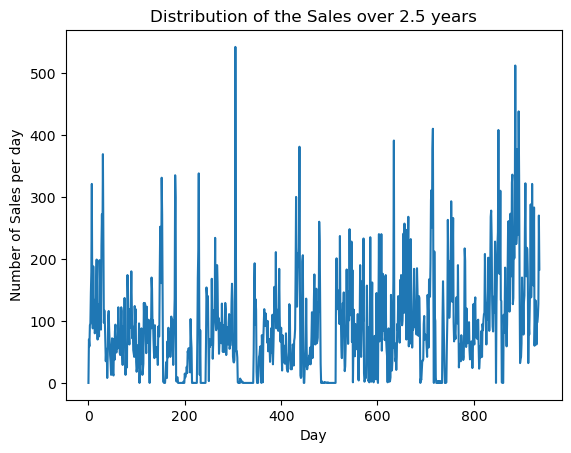

In [8]:
plt.xlabel("Day")
plt.ylabel("Number of Sales per day")
plt.plot(df["Sales"])
plt.title("Distribution of the Sales over 2.5 years")

# **Step 2 - Data preparation**

The goal of this step is to:
* Construct the X and Y where X denotes the matrix features and y is the label vector;
* Split dataset into training set and testing set: X_train,X_test,y_train,y_test.

## **2.2. Data Loading**

In [12]:
def load_data(data,seq_len):
  X=[]
  y=[]
  for i in range(seq_len,len(data)):
    X.append(data.iloc[i-seq_len:i,1])
    y.append(data.iloc[i,1])
  return X,y
X,y=load_data(df,45)
print(len(X))
print(len(y))

892
892


## **2.2. Data Split**

We split the dataset into 80% for train and 20% for test

In [15]:
train_size=len(y)*0.8
train_size=709

In [16]:
X_train=X[:train_size]
y_train=y[:train_size]
X_test=X[train_size:]
y_test=y[train_size:]

In [17]:
print(len(y_train))
print(len(y_test))

709
183


# **Step 3- Machine Learning**

In [19]:
#Inialization of ML algorithms
lr=LinearRegression()
neural=MLPRegressor(hidden_layer_sizes=(10,10),activation='logistic',solver='adam')
linear_svm=SVR(kernel='linear')
rbf_svm=SVR(kernel='rbf')
sigmoid_svm=SVR(kernel='sigmoid')
poly_svm=SVR(kernel='poly',degree=2)
# Training
lr.fit(X_train,y_train)
neural.fit(X_train,y_train)
linear_svm.fit(X_train,y_train)
rbf_svm.fit(X_train,y_train)
sigmoid_svm.fit(X_train,y_train)
poly_svm.fit(X_train,y_train)
# Testing
y_pred_lr=lr.predict(X_test)
y_pred_neural=neural.predict(X_test)
y_pred_linear_svm=linear_svm.predict(X_test)
y_pred_rbf_svm=rbf_svm.predict(X_test)
y_pred_sigmoid_svm=sigmoid_svm.predict(X_test)
y_pred_poly_svm=poly_svm.predict(X_test)

C:\Users\habou\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


# **Step 4- Performance Evaluation**

In [22]:
print(" **** Performance of Linear Regression *****")
mse_lr=mean_squared_error(y_test,y_pred_lr)
mae_lr=mean_absolute_error(y_test,y_pred_lr)
mape_lr=mean_absolute_percentage_error(y_test,y_pred_lr)
print("MSE= ",mse_lr)
print("MAE= ",mae_lr)
print("MAPEE= ",mape_lr)
print(" **** Performance of Neural Network Regression *****")
mse_neural=mean_squared_error(y_test,y_pred_neural)
mae_neural=mean_absolute_error(y_test,y_pred_neural)
mape_neural=mean_absolute_percentage_error(y_test,y_pred_neural)
print("MSE= ",mse_neural)
print("MAE= ",mae_neural)
print("MAPEE= ",mape_neural)
print(" **** Performance of SVR Linear Regression *****")
mse_linear_svm=mean_squared_error(y_test,y_pred_linear_svm)
mae_linear_svm=mean_absolute_error(y_test,y_pred_linear_svm)
mape_linear_svm=mean_absolute_percentage_error(y_test,y_pred_linear_svm)
print("MSE= ",mse_linear_svm)
print("MAE= ",mae_linear_svm)
print("MAPEE= ",mape_linear_svm)
print(" **** Performance of SVR RBF Regression *****")
mse_rbf_svm=mean_squared_error(y_test,y_pred_rbf_svm)
mae_rbf_svm=mean_absolute_error(y_test,y_pred_rbf_svm)
mape_rbf_svm=mean_absolute_percentage_error(y_test,y_pred_rbf_svm)
print("MSE= ",mse_rbf_svm)
print("MAE= ",mae_rbf_svm)
print("MAPEE= ",mape_rbf_svm)
print(" **** Performance of SVR Sigmoid Regression *****")
mse_sigmoid_svm=mean_squared_error(y_test,y_pred_sigmoid_svm)
mae_sigmoid_svm=mean_absolute_error(y_test,y_pred_sigmoid_svm)
mape_sigmoid_svm=mean_absolute_percentage_error(y_test,y_pred_sigmoid_svm)
print("MSE= ",mse_sigmoid_svm)
print("MAE= ",mae_sigmoid_svm)
print("MAPEE= ",mape_sigmoid_svm)
print(" **** Performance of SVR Polynomial Regression *****")
mse_poly_svm=mean_squared_error(y_test,y_pred_poly_svm)
mae_poly_svm=mean_absolute_error(y_test,y_pred_poly_svm)
mape_poly_svm=mean_absolute_percentage_error(y_test,y_pred_poly_svm)
print("MSE= ",mse_poly_svm)
print("MAE= ",mae_poly_svm)
print("MAPEE= ",mape_poly_svm)

 **** Performance of Linear Regression *****
MSE=  3946.8200094164094
MAE=  45.23424200190859
MAPEE=  4068588187617678.5
 **** Performance of Neural Network Regression *****
MSE=  24559.356014627672
MAE=  128.85223533534835
MAPEE=  916701592953855.0
 **** Performance of SVR Linear Regression *****
MSE=  4771.022024141293
MAE=  48.87512217181565
MAPEE=  3679871304045384.0
 **** Performance of SVR RBF Regression *****
MSE=  13555.998878843737
MAE=  83.21624209441715
MAPEE=  6068230012127222.0
 **** Performance of SVR Sigmoid Regression *****
MSE=  14241.413298886742
MAE=  85.66721947096812
MAPEE=  5538098540595548.0
 **** Performance of SVR Polynomial Regression *****
MSE=  5962.7684336159
MAE=  55.87464692169782
MAPEE=  5376627300315845.0


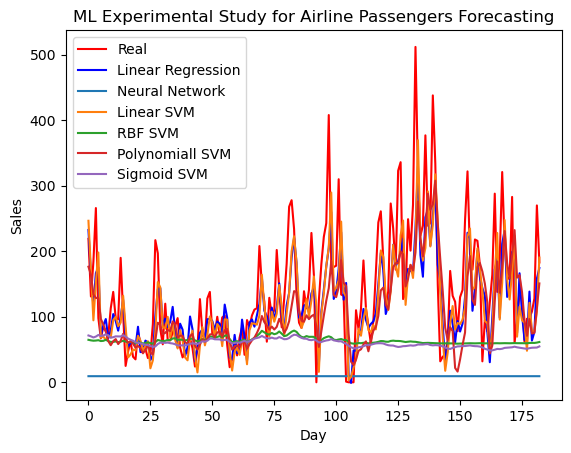

In [24]:
plt.xlabel("Day")
plt.ylabel("Sales")
plt.plot(y_test,color='red',label='Real')
plt.plot(y_pred_lr,color='blue',label='Linear Regression')
plt.plot(y_pred_neural,label='Neural Network')
plt.plot(y_pred_linear_svm,label='Linear SVM')
plt.plot(y_pred_rbf_svm,label='RBF SVM')
plt.plot(y_pred_poly_svm,label='Polynomiall SVM')
plt.plot(y_pred_sigmoid_svm,label='Sigmoid SVM')
plt.title("ML Experimental Study for Airline Passengers Forecasting")
plt.legend()

In [28]:
results = {
    "Model": ["Linear Regression", "Neural Network Regression", "SVR Linear Regression",
              "SVR RBF Regression", "SVR Sigmoid Regression", "SVR Polynomial Regression"],
    "MSE": [mse_lr, mse_neural, mse_linear_svm, mse_rbf_svm, mse_sigmoid_svm, mse_poly_svm],
    "MAE": [mae_lr, mae_neural, mae_linear_svm, mae_rbf_svm, mae_sigmoid_svm, mae_poly_svm],
    "MAPE": [mape_lr, mape_neural, mape_linear_svm, mape_rbf_svm, mape_sigmoid_svm, mape_poly_svm]
}

# Création d'un DataFrame à partir du dictionnaire
df_results = pd.DataFrame(results)

# Affichage du DataFrame
df_results.head()

,Model,MSE,MAE,MAPE
0,Linear Regression,3946.820009,45.234242,4.068588e+15
1,Neural Network Regression,24559.356015,128.852235,9.167016e+14
2,SVR Linear Regression,4771.022024,48.875122,3.679871e+15
3,SVR RBF Regression,13555.998879,83.216242,6.068230e+15
4,SVR Sigmoid Regression,14241.413299,85.667219,5.538099e+15


En se basant sur les valeurs de MSE (Mean Squared Error) fournies pour chaque modèle, on peut observer que la Linear Regression a le MSE le plus bas parmi les modèles évalués. Un MSE plus bas indique généralement un meilleur ajustement du modèle aux données.